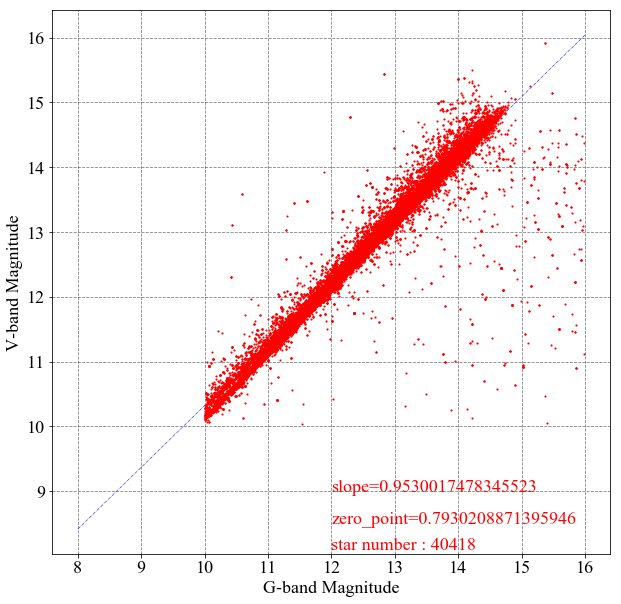

Complete!


In [2]:
# Gバンドから Vバンドの変換係数求める
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.backends.backend_pdf import PdfPages
from IPython.display import clear_output

df = pd.read_csv("simultaneous_event_candidates_table_MU+Tomo-e10.csv")
#df = pd.read_csv("test8.csv")
filename_csv_gaia = "d_csv_gaia_used/sub" + df["ID"] + "_star_used.csv"
filename_csv_ucac = "d_csv_ucac_used2/sub" + df["ID"] + "_star_used.csv"

def linear_fit(x, a, b):
    return a*x + b

table = np.arange(6).reshape(1,6)
for i in range(len(filename_csv_gaia)):
#for i in range(0,20):
    print filename_csv_gaia[i],i
    csv_gaia = pd.read_csv(filename_csv_gaia[i])
    csv_ucac = pd.read_csv(filename_csv_ucac[i])
    g_mag_star = csv_gaia["g_mag_star"].values
    x_gaia = csv_gaia["x_astropy"].values
    y_gaia = csv_gaia["y_astropy"].values
    table_gaia = np.vstack((g_mag_star,x_gaia,y_gaia))
    table_gaia = table_gaia.transpose()
    v_mag_star = csv_ucac["v_mag_star"].values
    x_ucac = csv_ucac["x_astropy"].values
    y_ucac = csv_ucac["y_astropy"].values
    table_ucac = np.vstack((v_mag_star,x_ucac,y_ucac))
    table_ucac = table_ucac.transpose()
    
###############################################################
    index_gaia = []
    index_ucac = []
    for j in range(len(table_ucac)):# Source Extractor と比較
    #for j in range(20):
            index = abs(table_gaia[:,1] - table_ucac[j,1])+\
                    abs(table_gaia[:,2] - table_ucac[j,2])
            if index.min() < 2.0:#候補がないやつを除く
                a = index.argmin()
                index_ucac = np.hstack((index_ucac,j))
                index_gaia = np.hstack((index_gaia,a))
                index_ucac = index_ucac.astype(np.int64)
                index_gaia = index_gaia.astype(np.int64)
    
    table_ucac = table_ucac[index_ucac,:]
    table_gaia = table_gaia[index_gaia,:]
    table_concat = np.hstack((table_ucac, table_gaia))
    table = np.vstack((table,table_concat))

table = np.delete(table,0,0)
param, cov = curve_fit(linear_fit, table[:,3], table[:,0])
clear_output()
##################################################################
###################################################### グラフ作る  ##    

star_number = len(table)
linear_x = np.arange(8,17)
y_fit = param[0]*linear_x + param[1]
txt1 = "slope=" + str(param[0])
txt2 = "zero_point=" + str(param[1])
txt3 = "star number : " + str(star_number)
fig = plt.figure(figsize=(10,10))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams["font.size"] = 18
plt.scatter(table[:,3], table[:,0],color = "red",marker='.', s=5,zorder=3)
plt.plot(linear_x, y_fit, color = "blue",linestyle='dashdot',linewidth=0.5)
#plt.plot(linear_x, linear_x, color = "red",linestyle='dashdot',linewidth=0.5)
plt.text(12,9,txt1,color='red')
plt.text(12,8.5,txt2,color='red')
plt.text(12,8.1,txt3,color='red')
plt.grid(which='major',color='black',linestyle='dashed',alpha=0.5)
plt.xlabel("G-band Magnitude")
plt.ylabel("V-band Magnitude")
pdf = PdfPages("gband2vband.pdf") #図をpdfに出力
pdf.savefig()
pdf.close()
plt.show()

###################################################################

columns =["g_mag_star", "g_x_astropy", "g_y_astropy","v_mag_star", "v_x_astropy", "v_y_astropy"] 
df_catalog = pd.DataFrame(data=table,columns=columns)
#df_catalog.to_csv("gband2vband_test.csv")
df_catalog.to_csv("gband2vband.csv")
#clear_output()
print "Complete!"